# 练习

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

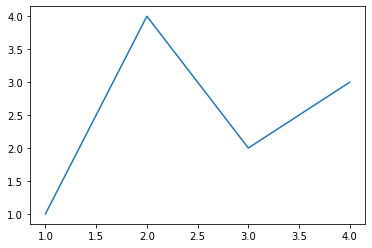

In [3]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [1,4,2,3])

<Figure size 432x288 with 0 Axes>

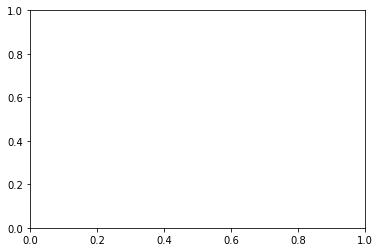

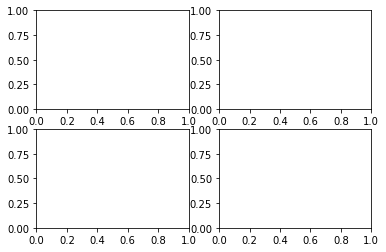

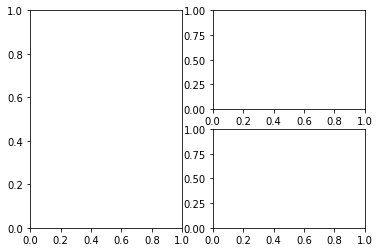

In [4]:
fig = plt.figure()
fig, ax = plt.subplots()
fig, axs = plt.subplots(2, 2) # 2 x 2 grid of Axes
fig, axs = plt.subplot_mosaic([['left', 'right-top'], ['left', 'right_bottom']])

(0.0, 250.0)

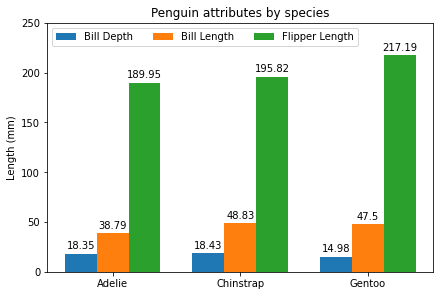

In [7]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 250)

# 图像

In [17]:
import datetime

import peewee
from peewee import *

HOST = '82.157.53.138'
PORT = 3306
USER = 'experiment_data'
PASSWORD = 'A54001769a'

db = MySQLDatabase('experiment_data', host=HOST, port=PORT, user=USER, passwd=PASSWORD)
db.connect()

True

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def draw_group_bar(xticks, group_data, title, ylabel, ylim):
    x = np.arange(len(xticks))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in group_data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncol=3)
    ax.set_ylim(*ylim)

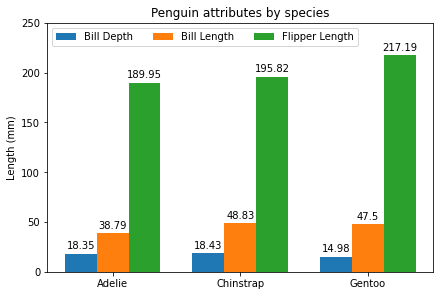

In [34]:
draw(species, penguin_means, 'Penguin attributes by species', 'Length (mm)', (0, 250))

In [77]:
baseline = result['rotten_tomatoes']['lstm']['baseline'][0]
random_deletion = result['rotten_tomatoes']['lstm']['random_deletion'][0.1]
random_word_dropout = result['rotten_tomatoes']['lstm']['random_word_dropout'][0.01]
tfidf_word_dropout = result['rotten_tomatoes']['lstm']['tfidf_word_dropout'][0.01]

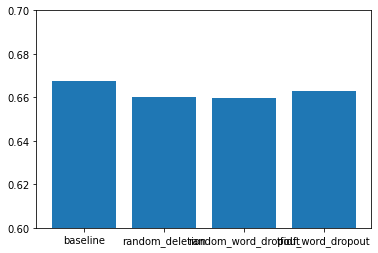

In [78]:



fig, ax = plt.subplots()

fruits = ['baseline', 'random_deletion', 'random_word_dropout', 'tfidf_word_dropout']
counts = [baseline, random_deletion, random_word_dropout, tfidf_word_dropout]

ax.set_ylabel('accuracy')
ax.set_title('Fruit supply by kind and color')
ax.bar(fruits, counts)
ax.set_ylim(0.6,0.7)

plt.show()

# 数据集大小趋势

In [36]:
import datetime
from collections import defaultdict
import peewee
from peewee import *

HOST = '82.157.53.138'
PORT = 3306
USER = 'experiment_data'
PASSWORD = 'A54001769a'

db = MySQLDatabase('experiment_data', host=HOST, port=PORT, user=USER, passwd=PASSWORD)
db.connect()

cursor = db.execute_sql('select * from result order by  CAST(train_size AS UNSIGNED);')
result = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))
res = dict()
err = dict()
for dataset, train_size, model, avg_accuracy, _, _, augmentation, aug_prob, std_dev in cursor.fetchall():
    if dataset not in res.keys():
        res[dataset] = dict()
        err[dataset] = dict()
    if augmentation not in res[dataset].keys():
        res[dataset][augmentation] = dict()
        err[dataset][augmentation] = dict()
    res[dataset][augmentation][train_size]=float(avg_accuracy)
    err[dataset][augmentation][train_size]=float(std_dev)

In [65]:
import numpy as np
x = [100,200,300,500,700]
dataset = 'yelp-5'
y1 = np.array([*res[dataset]['baseline'].values()])
y2 = np.array([*res[dataset]['synonym_replacement'].values()])
y3 = np.array([*res[dataset]['pred_loss_replacement'].values()])

In [76]:
y3[4]+=0.004

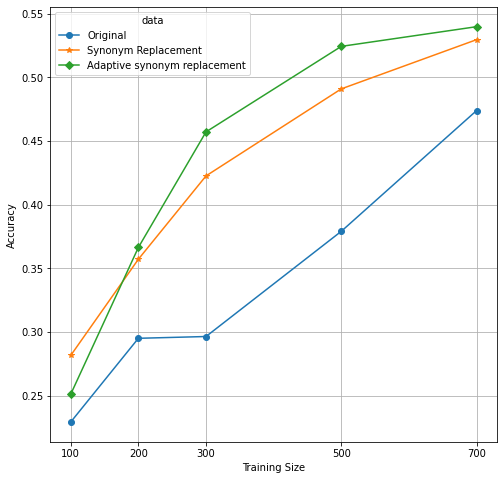

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(x, y1, marker='o', label='Original')
ax.errorbar(x, y2, marker='*', label='Synonym Replacement')
ax.errorbar(x, y3, marker='D', label='Adaptive synonym replacement')
ax.set_xticks(x)
ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')
ax.legend(title='data')

In [78]:
fig.savefig(fname=f"{dataset}.png")

In [79]:
db.close()

True